In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
data = pd.read_csv('model_data3.csv')
data['PO_Document_Date'] = pd.to_datetime(data['PO_Document_Date'] , format='%Y-%m-%d')
data = data[data['PO_Document_Date']>=pd.to_datetime('2021-01-01', format='%Y-%m-%d')]
# Parameters
mg = '017'
thresh_n = 15
increments = .1 #[1,.9,.8,.7,.6,.5,.5,.4,.4,.3,.3,.3,.2,.2,.2,.2,.2,.1,.1,.1,.1,.1,.1,.1,.1,.1,.1,0,0,0,0,0,0,0,0,0,0]
metric = 'Days Late'
NUMBER = 0
time_intervals = 'M'

In [89]:
mg_data = data[data['Material_Group'] == mg]
mg_data['PO_Document_Date'] = pd.to_datetime(mg_data['PO_Document_Date'], format='%Y-%m-%d')
days_late = mg_data.groupby('Supplier').resample(time_intervals, closed='left', on='PO_Document_Date').mean()['days_late'].reset_index()
days_var = mg_data.groupby('Supplier').resample(time_intervals, closed='left', on='PO_Document_Date').std()['days_late'].reset_index()
days_var =days_var.rename(columns={'days_late':'std'})
days_data = pd.merge(days_late, days_var, how='left', left_on=['PO_Document_Date', 'Supplier'], right_on=['PO_Document_Date','Supplier'])
sample_size = mg_data.groupby('Supplier').resample(time_intervals, closed='left', on='PO_Document_Date').count()['PO_Number'].reset_index()
agg_data = pd.merge(days_data, sample_size, how='left', left_on=['PO_Document_Date', 'Supplier'], right_on=['PO_Document_Date','Supplier'])

/var/folders/ng/clzczwr96wz__2znzb2hjykr0000gn/T/ipykernel_60041/1007390880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mg_data['PO_Document_Date'] = pd.to_datetime(mg_data['PO_Document_Date'], format='%Y-%m-%d')


In [90]:
thresh_n = 2
dates = list(agg_data['PO_Document_Date'].unique())
MVEF_Ingest = pd.DataFrame({'Month': dates})
keep_columns = ['Month']
perf_columns = []
for supplier in set(agg_data['Supplier']):
    sup_data = agg_data[agg_data['Supplier'] == supplier][['PO_Document_Date', 'days_late']]
    non_nulls = [x for x in sup_data['days_late'] if x > -1000]
    if agg_data[agg_data['Supplier'] == supplier]['PO_Number'].sum() < 15:
        continue
    sup_data = sup_data.rename(
        columns={'days_late': f'{supplier} days_late', 'PO_Document_Date': f'{supplier}_date'})
    keep_columns.append(f'{supplier} days_late')
    perf_columns.append(f'{supplier} days_late')
    MVEF_Ingest = pd.merge(MVEF_Ingest, sup_data, how='left', left_on='Month', right_on=f'{supplier}_date')
MVEF_Ingest = MVEF_Ingest[keep_columns]
MVEF_Clean = MVEF_Ingest[perf_columns].interpolate(method='linear', axis=0, limit_direction='forward')
MVEF_Clean['Month'] = MVEF_Ingest['Month']
MVEF_Clean = MVEF_Clean.dropna()
MVEF_Clean = MVEF_Clean[keep_columns]
MVEF_Clean

,Month,PURFORMS INC days_late,GRAND RAPIDS FOAM TECHNOLOGIES days_late,INTEX TECHNOLOGIES LLC days_late,ALL METAL DESIGNS INC days_late,STEELCASE SA (FRANCE) days_late
0,2021-03-31,-0.750000,-4.000000,-0.666667,0.100000,28.500000
1,2021-04-30,-1.000000,0.000000,-1.666667,5.724138,-6.000000
2,2021-05-31,-1.000000,2.767442,1.000000,2.523810,52.500000
3,2021-06-30,-1.000000,6.290323,-0.083333,9.333333,48.000000
4,2021-07-31,-1.000000,3.321429,-0.600000,4.105263,-10.000000
5,2021-08-31,-1.000000,11.666667,-1.200000,0.000000,-7.333333
6,2021-09-30,-1.000000,3.709677,-1.000000,-0.076923,-4.666667
7,2021-10-31,-1.000000,4.230769,-0.333333,2.400000,-2.000000
8,2021-11-30,-0.500000,3.125000,-0.750000,-0.187500,0.666667
9,2021-12-31,0.000000,-24.625000,-0.333333,0.947368,3.333333


In [94]:
# Find Covariance Matrix
sigma = MVEF_Clean[perf_columns].corr()
sigma

,PURFORMS INC days_late,GRAND RAPIDS FOAM TECHNOLOGIES days_late,INTEX TECHNOLOGIES LLC days_late,ALL METAL DESIGNS INC days_late,STEELCASE SA (FRANCE) days_late
PURFORMS INC days_late,1.000000,-0.085156,-0.125050,0.822427,0.522355
GRAND RAPIDS FOAM TECHNOLOGIES days_late,-0.085156,1.000000,0.053529,0.110168,0.004013
INTEX TECHNOLOGIES LLC days_late,-0.125050,0.053529,1.000000,-0.139032,0.130950
ALL METAL DESIGNS INC days_late,0.822427,0.110168,-0.139032,1.000000,0.652681
STEELCASE SA (FRANCE) days_late,0.522355,0.004013,0.130950,0.652681,1.000000


In [92]:
for supplier in ['PURFORMS INC','GRAND RAPIDS FOAM TECHNOLOGIES','INTEX TECHNOLOGIES LLC','ALL METAL DESIGNS INC','STEELCASE SA (FRANCE)']:
    d1 = data[(data['Material_Group'] == mg)&(data['Supplier'] == supplier)]['days_late']
    auto = d1.autocorr()
    print(auto)

0.5341778790212885
0.20433236567556118
0.4759720940769328
0.04456517725017725
0.0785623302149577


In [ ]:
# Find first sum
N = 1000
mean = mu * N
variance = (N-1) * (var * (2 + (2 * autocorr)))
# Find second sum

total_mean = t

In [ ]:
def point_generator(w_matrix, cov_matrix, MVEF_Clean):
    points = {}
    for point in range(0, len(w_matrix)):
        point_var = (w_matrix.loc[point]*cov_matrix.dot(w_matrix.loc[point])).sum()
        point_std = point_var**(1/2)
        point_mean = (w_matrix.loc[point] * MVEF_Clean.mean(numeric_only=True)).sum()
        points[point] = (point_mean, point_std)
    MVEF = pd.DataFrame({'Point':points.keys(),
                         'Mean':[x[0] for x in points.values()],
                         'Std':[x[1] for x in points.values()],
                         })
    return MVEF

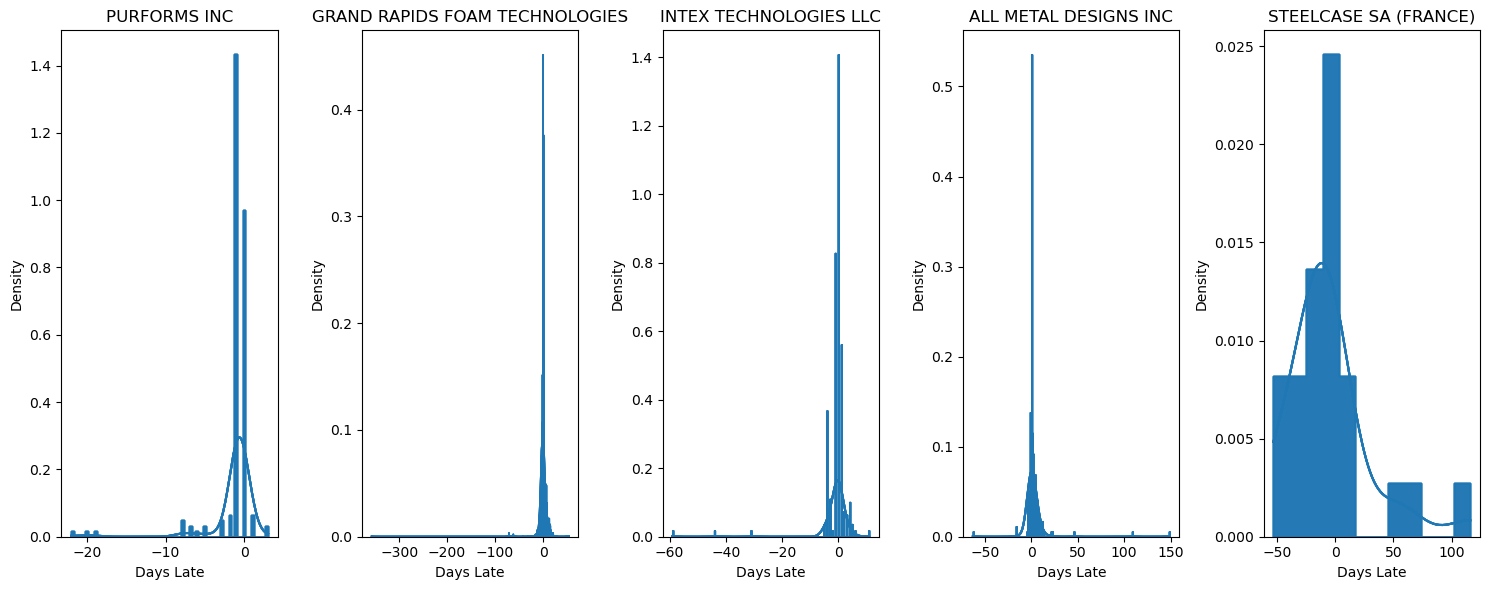

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 6))
suppliers = ['PURFORMS INC','GRAND RAPIDS FOAM TECHNOLOGIES','INTEX TECHNOLOGIES LLC','ALL METAL DESIGNS INC','STEELCASE SA (FRANCE)']
#Plot on 2 x 2 ax object
for i in range(ax.shape[0]):
    for index,supplier in enumerate(suppliers):
        plot = sns.histplot(data[(data['Supplier']==supplier)&(data['Material_Group']==mg)]['days_late'],
                    kde=True,
                    # bins=10,
                    ax=ax[index],
                    stat='density',
                    element='step',
                            )
        plot.set_xlabel('Days Late')
        plot.set_title(f'{supplier}')

plt.tight_layout()

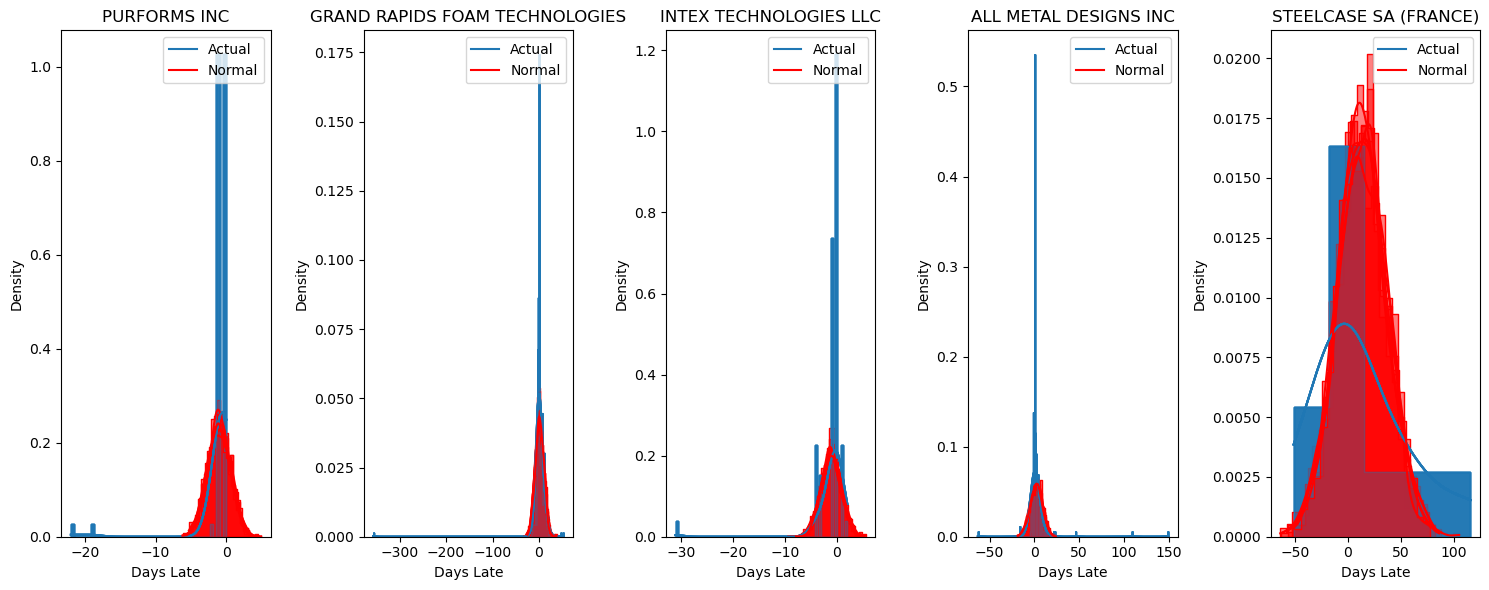

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 6))
suppliers = ['PURFORMS INC','GRAND RAPIDS FOAM TECHNOLOGIES','INTEX TECHNOLOGIES LLC','ALL METAL DESIGNS INC','STEELCASE SA (FRANCE)']
#Plot on 2 x 2 ax object
for i in range(ax.shape[0]):
    for index,supplier in enumerate(suppliers):
        plot = sns.histplot(data[(data['Supplier']==supplier)&(data['Material_Group']==mg)]['days_late'],
                    kde=True,
                    label='Actual',
                    ax=ax[index],
                    stat='density',
                    element='step',
                            )
        mu = data[(data['Supplier']==supplier)&(data['Material_Group']==mg)]['days_late'].mean()
        std = data[(data['Supplier']==supplier)&(data['Material_Group']==mg)]['days_late'].std()
        s = np.random.normal(mu, std**1/2, 1000)
        sns.histplot(s,
            kde=True,
            label='Normal',
            color='red',
            ax=ax[index],
            stat='density',
            element='step')
        plot.set_xlabel('Days Late')
        plot.set_title(f'{supplier}')
        plot.legend(labels=['Actual','Normal'])

plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 6))
suppliers = ['PURFORMS INC','GRAND RAPIDS FOAM TECHNOLOGIES','INTEX TECHNOLOGIES LLC','ALL METAL DESIGNS INC','STEELCASE SA (FRANCE)']
#Plot on 2 x 2 ax object
for i in range(ax.shape[0]):
    for index,supplier in enumerate(suppliers):
        plot = sns.histplot(data[(data['Supplier']==supplier)&(data['Material_Group']==mg)]['days_late'],
                    kde=True,
                    label='Actual',
                    ax=ax[index],
                    stat='density',
                    element='step',
                            )
        mu = data[(data['Supplier']==supplier)&(data['Material_Group']==mg)]['days_late'].mean()
        std = data[(data['Supplier']==supplier)&(data['Material_Group']==mg)]['days_late'].std()
        s = np.random.normal(mu, std**1/2, 1000)
        sns.histplot(s,
            kde=True,
            label='Normal',
            color='red',
            ax=ax[index],
            stat='density',
            element='step')
        plot.set_xlabel('Days Late')
        plot.set_title(f'{supplier}')
        plot.legend(labels=['Actual','Normal'])

plt.tight_layout()

In [74]:
from scipy.stats import normaltchisquareest
from fitter import Fitter, get_common_distributions, get_distributions
from  scipy.stats import chisquare
def check_p_val(p_val, alpha):

    if p_val < alpha:
        print('We have evidence to reject the null hypothesis.')
    else:
        print('We do not have evidence to reject the null hypothesis.')

ImportError: cannot import name 'normaltchisquareest' from 'scipy.stats' (/Users/whitmanblass/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/__init__.py)

In [78]:
from  scipy.stats import chisquare
for supplier in suppliers:

    print(supplier)
    d1 = data[(data['Supplier']==supplier)&(data['Material_Group']==mg)]['days_late']
    d1 = d1.dropna()
    mu = d1.mean()
    std = d1.std()
    s = np.random.normal(mu, std**1/2, 1000)
    count, bins = np.histogram(d1)
    print(count)
    count2, bins2 = np.histogram(s, bins=bins)
    print(count2)
    for val in count:

    print(chisquare(count, count2))
    break
    # f = Fitter(d1,
    #        distributions=get_common_distributions())
    # f.fit()
    # print(f.summary())
    # print(len(d1))
    # stat, p_val = normaltest(d1)
    # print('\nNormaltest p-value is: {:1.2f} \n'.format(p_val))
    # # With alpha value of 0.05, how should we proceed
    # check_p_val(p_val, alpha=0.05)

PURFORMS INC
[  2   1   0   0   0   3   5   3 150   6]
[  0   0   0   0   0   0   9 303 563 124]


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
4.876470588235295

In [ ]:
months = list(agg_data['PO_Document_Date'].unique())
distribution_data = pd.DataFrame(dist_data)

In [ ]:
# Process Data
def data_process(mg, thresh_n, data):
    # Create initial data frame
    mg_data = data[data['Material_Group'] == mg]
    mg_data['late_bin'] = np.where(mg_data['days_late'] > 0, 1, 0)
    mg_data['PO_Document_Date'] = pd.to_datetime(mg_data['PO_Document_Date'], format='%Y-%m-%d')
    month_data = mg_data.groupby('Supplier').resample('M', on='PO_Document_Date')
    late_p = grouped.mean()['late_bin'].reset_index()
    late_p['OTP'] = 1 - late_p['late_bin']
    # Continuous data axis
    dates = list(late_p['PO_Document_Date'].unique())
    MVEF_Ingest = pd.DataFrame({'Month': dates})
    # For every supplier, left join so that we can see where the date gaps are
    keep_columns = ['Month']
    perf_columns = []
    for supplier in set(late_p['Supplier']):
        sup_data = late_p[late_p['Supplier'] == supplier][['PO_Document_Date', 'OTP']]
        non_nulls = [x for x in sup_data['OTP'] if x > -1000]
        if len(non_nulls) < thresh_n:
            continue
        sup_data = sup_data.rename(
            columns={'OTP': f'{supplier} OTP', 'PO_Document_Date': f'{supplier}_date'})
        keep_columns.append(f'{supplier} OTP')
        perf_columns.append(f'{supplier} OTP')
        MVEF_Ingest = pd.merge(MVEF_Ingest, sup_data, how='left', left_on='Month', right_on=f'{supplier}_date')
    MVEF_Ingest = MVEF_Ingest[keep_columns]
    MVEF_Clean = MVEF_Ingest[perf_columns].interpolate(method='linear', axis=0, limit_direction='forward')
    MVEF_Clean['Month'] = MVEF_Ingest['Month']
    MVEF_Clean = MVEF_Clean.dropna()
    MVEF_Clean = MVEF_Clean[keep_columns]
    # Find Covariance Matrix
    sigma = MVEF_Clean[perf_columns].cov()
    # MVP and Minimum Variance
    inverse_sigma = pd.DataFrame(np.linalg.pinv(sigma.values), sigma.columns, sigma.index)
    lambda_star = (1 / inverse_sigma.dot([1] * len(sigma)).sum())
    sqrt_lamda_star = lambda_star ** (1 / 2)  # Minimum std that can be achieved
    # minimum variance portfolio
    mvp = (lambda_star * inverse_sigma.dot([1] * len(sigma)))
    return MVEF_Clean, sigma, perf_columns, sqrt_lamda_star, mvp

# Function to create weight combinations to test
def portfolio_generator(columns, increments):
    subsets = set()
    for subset in tqdm(itertools.permutations(increments, len(columns))):
        if sum(subset) == 1:
            subsets.add(subset)
    weights = {}
    for index, column in enumerate(columns):
        weights[column] = [x[index] for x in subsets]
    w_martrix = pd.DataFrame(weights)
    return w_martrix

# Function to find mean, variance, and std of each portfolio
def point_generator(w_matrix, cov_matrix, MVEF_Clean):
    points = {}
    for point in range(0, len(w_matrix)):
        point_var = (w_matrix.loc[point]*cov_matrix.dot(w_matrix.loc[point])).sum()
        point_std = point_var**(1/2)
        point_mean = (w_matrix.loc[point] * MVEF_Clean.mean(numeric_only=True)).sum()
        points[point] = (point_mean, point_std)
    MVEF = pd.DataFrame({'Point':points.keys(),
                         'Mean':[x[0] for x in points.values()],
                         'Std':[x[1] for x in points.values()],
                         })
    return MVEF

# Compare a MVEF Point performance at a certain point in time to actual performance
def evaluate_portfolio(point, w_matrix, raw_data, MVEF_Clean, perf_columns, mg, decision_date, delay):
    # Enforce data type
    decision_date = pd.to_datetime(decision_date, format='%Y-%m-%d')
    # Find actual performance
    mg_group = raw_data[raw_data['Material_Group'] == mg]
    mg_group['late_bin'] = np.where(mg_group['days_late'] > 0, 1, 0)
    mg_group['PO_Document_Date'] = pd.to_datetime(mg_group['PO_Document_Date'], format='%Y-%m-%d')
    grouped = mg_group.resample('M', on='PO_Document_Date')
    late_p = grouped.mean()['late_bin'].reset_index()
    number_POs = grouped.nunique()['PO_Number'].reset_index()
    number_POs = number_POs.rename(columns={'PO_Document_Date': 'Date'})
    useful_data = pd.merge(late_p, number_POs, how='left', left_on='PO_Document_Date', right_on='Date')[
        ['Date', 'late_bin', 'PO_Number']]
    useful_data['Actual_Late_POs'] = useful_data['PO_Number'] * useful_data['late_bin']
    # Now Find What Performance of the new portfolio would be
    portfolio = w_matrix.loc[point]
    portfolio_performance = pd.DataFrame({
        'port_Date': MVEF_Clean['Month'],
        'Portfolio Performance': (MVEF_Clean[perf_columns] * portfolio).sum(axis=1)
    })
    useful_data = pd.merge(useful_data, portfolio_performance, how='left', left_on='Date', right_on='port_Date')
    useful_data['Portolio_Late_POs'] = useful_data['PO_Number'] * (1 - useful_data['Portfolio Performance'])
    useful_data['Actual_Late_POs'] = useful_data['Actual_Late_POs'].apply(np.ceil)
    useful_data['Portolio_Late_POs'] = useful_data['Portolio_Late_POs'].apply(np.ceil)
    # Compute when decision would take effect
    effective_date = decision_date + MonthEnd(delay + 1)
    # Now find what performance what have been over time given data, portfolio, decision time, and delay
    useful_data['Implemented POs'] = np.where(useful_data['Date'] >= effective_date,
                                              useful_data['Portolio_Late_POs'],
                                              np.NAN
                                              )
    return useful_data